# Predicting the medical insurance cost of a person

In this project we will build a linear regression model to predict the insurance prima for an individual based on different factors.

This dataset has 7 columns. We will use the 'charges' column as the target variable because we want to create a model that predicts the cost of the insurance based on different factors.

## Columns:

**age:** age of primary beneficiary.

**sex:** insurance contractor gender, female or male.

**bmi:** Body mass index.

**children:** Number of children covered by health insurance / Number of dependents.

**smoker:** Smoking.

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance.

In [1]:
pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
%matplotlib inline

In [3]:
# Downloading the data
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv', sep=',')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Descriptive Statistics

In [5]:
# Numerical variables
round(df_raw.describe())

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.0,31.0,1.0,13270.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4740.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16640.0
max,64.0,53.0,5.0,63770.0


In [6]:
# Categorical variables
df_raw.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### There is duplicated data?

In [7]:
duplicates = df_raw.duplicated().sum()
duplicates

1

In [8]:
# We remove the duplicated data
df = df_raw.copy()
df = df[df.duplicated() == False]

### Visualizing the data

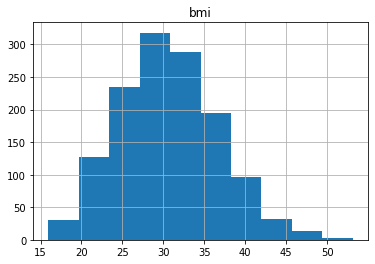

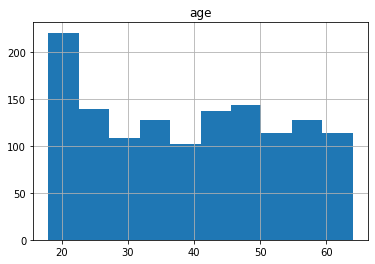

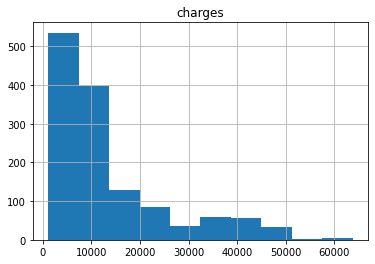

In [9]:
# Plotting the distribution of the numerical variables
variables = ['bmi','age','charges']
for v in variables:
  df[v].hist()
  plt.title(v)
  plt.show()

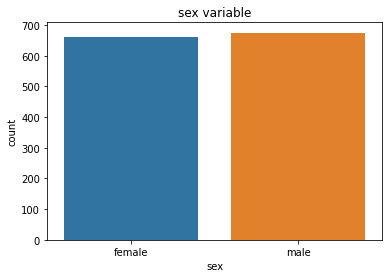

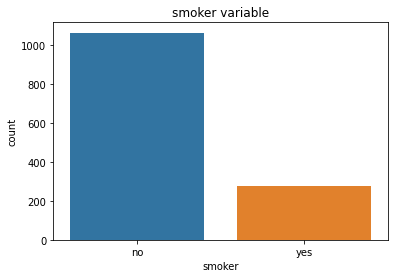

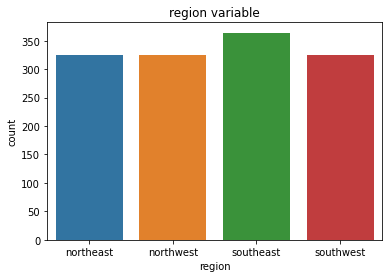

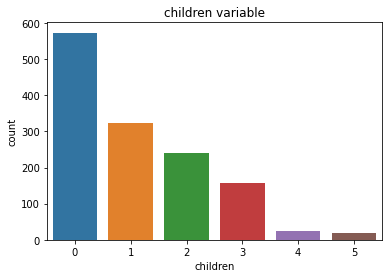

In [10]:
# Plotting the categorical variables
variables = ['sex','smoker','region','children']
for v in variables:
  data = df.sort_values(by=[v])
  sns.countplot(x=data[v], data=data)
  plt.title(f'{v} variable')
  plt.show()

In [11]:
# Box plots for charges and it's relation with the other variables
fig = px.box(df, y="charges")
fig.show()

In [12]:
fig = px.box(df, x="sex", y="charges")
fig.show()

* We can observe that sex variable doesn't change much the medical costs insurance.

In [13]:
fig = px.box(df, x="region", y="charges")
fig.show()

* In the case of region variable we can observe that it also doesn't change much the medical cost insurance.

In [14]:
fig = px.box(df, x="smoker", y="charges")
fig.show()

In the smoker case we observe that a smoker and non-smoker affect the medical costs insurance, the charges for smokers are more expensive because the risk of having a medical difficulty is higher in this case.

In [15]:
fig = px.box(df, x="children", y="charges")
fig.show()

In the amount of children we observe a higher price for four childrens and lowest for five childrens, and also observe a bigger number of insurances for two childrens.

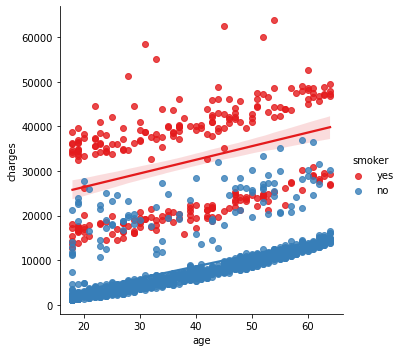

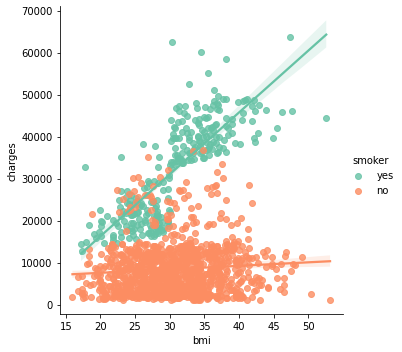

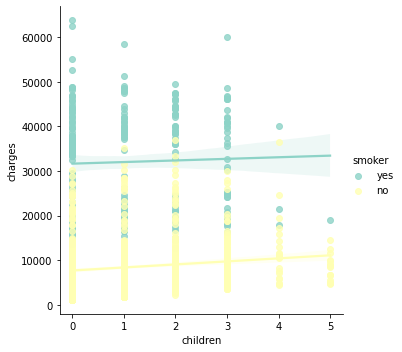

In [16]:
# Relationship between charges and other variables for smokers and non-somokers
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

* Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. 

### Encoding of categorical variables

In [17]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
# Region variable convertion
def conv_region(region_name):
  if region_name == 'southwest':
    return 1
  elif region_name == 'southeast':
    return 2
  elif region_name == 'northwest':
    return 3
  elif region_name == 'northeast':
    return 4
  else:
    return 'Region sin determinar'

df['region'] = df.apply(lambda x: conv_region(x['region']), axis=1)


In [19]:
# Sex variable convertion
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [20]:
# Smoker variable convertion
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


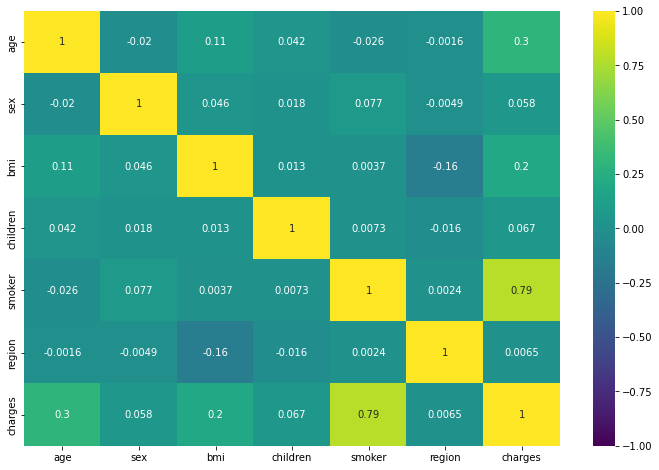

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

We observe only a strong and positive correlation with the smoking variable.

# Linear regression

para la regresión lineal hacer el train y test

In [23]:
# Separating the target variable (y) from the predictors(X)
X = df.drop(['charges'], axis=1)
y = df['charges']

In [24]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
l_regr = LinearRegression()
l_regr.fit(X_train, y_train)

LinearRegression()

In [26]:
print('Intercept: \n', l_regr.intercept_)
print('Coefficients: \n', l_regr.coef_)
Y_train_pred = l_regr.predict(X_train)
Y_test_pred = l_regr.predict(X_test)
print('Score: \n', l_regr.score(X_test, y_test))

Intercept: 
 -11998.187146657892
Coefficients: 
 [  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173   237.62514748]
Score: 
 0.8068466322629111


In [27]:
X_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,4
968,21,1,25.745,2,0,4
599,52,0,37.525,2,0,3
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,4
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,4
1131,27,1,45.900,2,0,1
1295,20,1,22.000,1,0,1
861,38,0,28.000,3,0,1


In [28]:
# An example to predict the charges
age = 33
sex = 1
bmi = 22
children = 0
smoker = 1
region= 3
print('Predicted charge: \n', l_regr.predict([[age,sex,bmi,children,smoker,region]]))

Predicted charge: 
 [26753.7589907]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## Hypertune the model

In [29]:
# Obtain the list of parameters implemented on the estimator
l_regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [33]:
# We search for the best parameters configuration using grid search
copy_X = [True, False]
fit_intercept = [True, False]
positive = [True, False]
param_grid = dict(copy_X=copy_X, fit_intercept=fit_intercept, positive=positive)
grid_search = GridSearchCV(estimator=l_regr, param_grid=param_grid, n_jobs=-1, error_score=0)
grid_result = grid_search.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.747284 using {'copy_X': True, 'fit_intercept': True, 'positive': True}
0.747284 (0.023933) with: {'copy_X': True, 'fit_intercept': True, 'positive': True}
0.747129 (0.023870) with: {'copy_X': True, 'fit_intercept': True, 'positive': False}
0.716612 (0.017608) with: {'copy_X': True, 'fit_intercept': False, 'positive': True}
0.719396 (0.018829) with: {'copy_X': True, 'fit_intercept': False, 'positive': False}
0.747284 (0.023933) with: {'copy_X': False, 'fit_intercept': True, 'positive': True}
0.747129 (0.023870) with: {'copy_X': False, 'fit_intercept': True, 'positive': False}
0.716612 (0.017608) with: {'copy_X': False, 'fit_intercept': False, 'positive': True}
0.719396 (0.018829) with: {'copy_X': False, 'fit_intercept': False, 'positive': False}


In [31]:
# Using the optimized model
optimized_l_regr = LinearRegression(copy_X= True, fit_intercept= True, positive= True)
optimized_l_regr.fit(X_train, y_train)

LinearRegression(positive=True)

In [32]:
y_pred = optimized_l_regr.predict(X_test)
print('Intercept: \n', optimized_l_regr.intercept_)
print('Coefficients: \n', optimized_l_regr.coef_)
print('Score: \n', optimized_l_regr.score(X_test, y_test))

Intercept: 
 -12035.816247255567
Coefficients: 
 [  248.87841745     0.           312.18564663   534.15195504
 23041.7672531    236.34291238]
Score: 
 0.8067723185156508


The previous model give us a better score.